# Brief : Analyse de données (Boston_Crime)
Luigi Bokalli, Baptise Le Berre, Jérémy Le Joncour

In [82]:
import pandas as pd
from sklearn import preprocessing
import warnings 
warnings.filterwarnings("ignore")

#Importer les fichiers :
crime = pd.read_csv('crime.csv', encoding='latin-1')
offense_codes = pd.read_csv('offense_codes.csv', encoding='latin-1')

# Nettoyage

In [83]:
crime.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [84]:
crime.shape

(319073, 17)

In [85]:
#Ajouter les groupes à offense_codes :
dict_offenses = dict()
for group in set(crime["OFFENSE_CODE_GROUP"]):
    list_code = list()
    for code in set(crime["OFFENSE_CODE"][crime.OFFENSE_CODE_GROUP == group]):
        list_code.append(code)
    dict_offenses[group] = list_code

    
list_offense_codes = list()
for code in offense_codes["CODE"]:
    group_found = False
    for group in dict_offenses:
        if group_found == False:
            if code in dict_offenses[group]:
                list_offense_codes.append(group)
                group_found = True
    if group_found == False:
        list_offense_codes.append("UNKNOWN")

offense_codes["OFFENSE_CODE_GROUP"] = list_offense_codes

In [86]:
#Ajouter les codes manquants de crime à offense_codes:
len_crime = len(crime.index)
num_row = 0
percent_crime2 = 0

list_verif_codes = list()

j = len(offense_codes)

for i in crime.index:
    percent_crime = int((num_row/len_crime)*100)
    if percent_crime > percent_crime2:
        percent_crime2 += 1
        print("percent ", percent_crime2)
    num_row += 1
    if crime["OFFENSE_CODE"][i] not in offense_codes["CODE"]:
        if crime["OFFENSE_CODE"][i] not in list_verif_codes:
            list_verif_codes.append(int(crime["OFFENSE_CODE"][i]))
            j += 1
            offense_codes.loc[j] = [int(crime["OFFENSE_CODE"][i])] + [crime["OFFENSE_DESCRIPTION"][i]] + [crime["OFFENSE_CODE_GROUP"][i]]
            print(offense_codes.loc[j])

CODE                                 619
NAME                  LARCENY ALL OTHERS
OFFENSE_CODE_GROUP               Larceny
Name: 577, dtype: object
CODE                       1402
NAME                  VANDALISM
OFFENSE_CODE_GROUP    Vandalism
Name: 578, dtype: object
CODE                                 3410
NAME                  TOWED MOTOR VEHICLE
OFFENSE_CODE_GROUP                  Towed
Name: 579, dtype: object
CODE                                  3114
NAME                  INVESTIGATE PROPERTY
OFFENSE_CODE_GROUP    Investigate Property
Name: 580, dtype: object
CODE                                                        3820
NAME                  M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY
OFFENSE_CODE_GROUP               Motor Vehicle Accident Response
Name: 581, dtype: object
CODE                         724
NAME                  AUTO THEFT
OFFENSE_CODE_GROUP    Auto Theft
Name: 582, dtype: object
CODE                             3301
NAME                   VERBAL DISPUTE
OFFENS

CODE                                                           1501
NAME                  WEAPON - FIREARM - CARRYING / POSSESSING, ETC
OFFENSE_CODE_GROUP                               Firearm Violations
Name: 625, dtype: object
CODE                                 3001
NAME                  DEATH INVESTIGATION
OFFENSE_CODE_GROUP     Medical Assistance
Name: 626, dtype: object
CODE                                                   3830
NAME                  M/V - LEAVING SCENE - PERSONAL INJURY
OFFENSE_CODE_GROUP          Motor Vehicle Accident Response
Name: 627, dtype: object
CODE                                                      2914
NAME                  VAL - OPERATING W/O AUTHORIZATION LAWFUL
OFFENSE_CODE_GROUP                                  Violations
Name: 628, dtype: object
CODE                         2610
NAME                  TRESPASSING
OFFENSE_CODE_GROUP          Other
Name: 629, dtype: object
CODE                          1109
NAME                  FRAUD - WIRE
OFFE

CODE                                             2616
NAME                  POSSESSION OF BURGLARIOUS TOOLS
OFFENSE_CODE_GROUP                              Other
Name: 681, dtype: object
CODE                                              1304
NAME                  PROPERTY - STOLEN THEN RECOVERED
OFFENSE_CODE_GROUP           Recovered Stolen Property
Name: 682, dtype: object
CODE                                                2511
NAME                  KIDNAPPING - ENTICING OR ATTEMPTED
OFFENSE_CODE_GROUP                                 Other
Name: 683, dtype: object
CODE                                             2005
NAME                               CHILD ENDANGERMENT
OFFENSE_CODE_GROUP    Offenses Against Child / Family
Name: 684, dtype: object
CODE                                               1605
NAME                  PROSTITUTION - COMMON NIGHTWALKER
OFFENSE_CODE_GROUP                         Prostitution
Name: 685, dtype: object
CODE                                           

CODE                                            2641
NAME                  VIOLATION - HAWKER AND PEDDLER
OFFENSE_CODE_GROUP                             Other
Name: 728, dtype: object
CODE                                          2631
NAME                  PROPERTY - CONCEALING LEASED
OFFENSE_CODE_GROUP                           Other
Name: 729, dtype: object
CODE                                                  3029
NAME                  PRISONER - SUICIDE / SUICIDE ATTEMPT
OFFENSE_CODE_GROUP              Prisoner Related Incidents
Name: 730, dtype: object
percent  10
CODE                                     2642
NAME                        TRUANCY / RUNAWAY
OFFENSE_CODE_GROUP    Missing Person Reported
Name: 731, dtype: object
percent  11
CODE                                                   1502
NAME                  WEAPON - FIREARM - SALE / TRAFFICKING
OFFENSE_CODE_GROUP                       Firearm Violations
Name: 732, dtype: object
percent  12
percent  13
percent  14
percent 

In [87]:
#Remplacer les valeurs de 'SHOOTING' par des 0 et 1 (1 signifiant l'utilisation d'armes à feu):
crime["SHOOTING"] = crime["SHOOTING"].fillna(0)
crime["SHOOTING"] = crime["SHOOTING"].replace({"Y": 1})

In [88]:
#Créer une colonne 'DAY_OF_MONTH' :
crime['DAY_OF_MONTH'] = pd.DatetimeIndex(crime['OCCURRED_ON_DATE']).day
list_columns = list(crime.columns)
list_columns.remove('DAY_OF_MONTH')
list_columns.insert(10, 'DAY_OF_MONTH')
crime = crime.reindex(columns = list_columns)

In [89]:
#Réduire crime aux 6 derniers mois de 2017 :
crime = crime[crime.YEAR == 2017][crime.MONTH > 6]

In [90]:
#Remplacer les groupes inconnus au mieux possible :
for i in range(len(offense_codes)):
    try:
        offense_name = offense_codes["NAME"][i]
        if offense_name.split()[0] == "RAPE" and offense_name.split()[1] != "ATTEMPT" :
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Rape"
        elif offense_name.split()[0] == "RAPE" and offense_name.split()[1] == "ATTEMPT" :
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Rape / Attempt"
        elif offense_name.split()[0] == "GAMBLING":
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Gambling"
        elif offense_name.split()[0] == "MANSLAUGHTER":
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Manslaughter"
        elif offense_name.split()[0] == "ROBBERY" and offense_name.split()[1] != "ATTEMPT" :
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Robbery"
        elif offense_name.split()[0] == "ROBBERY" and offense_name.split()[1] == "ATTEMPT" :
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Robbery / Attempt"
        elif offense_name.split()[0] == "ROBERRY" and offense_name.split()[1] != "ATTEMPT" :
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Robbery"
        elif offense_name.split()[0] == "ROBERRY" and offense_name.split()[1] == "ATTEMPT" :
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Robbery / Attempt"
        elif offense_name.split()[0] == "VAL":
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Violations"
        elif offense_name.split()[0] == "AUTO" and offense_name.split()[1] == "THEFT" :
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Auto Theft"
        elif offense_name.split()[0] == "TOWED":
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Towed"
        elif offense_name.split()[0] == "SEARCH" and offense_name.split()[1] == "WARRANT" :
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Search Warrants"
        elif offense_name.split()[0] == "LARCENY":
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Larceny"
        elif offense_name.split()[0] == "ARSON":
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Arson"
        elif offense_name.split()[0] == "DRUGS":
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Drug Violation"
        elif offense_name.split()[0] == "ASSAULT" and offense_name.split()[2] == "BATTERY" :
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Aggravated Assault"
        elif offense_name.split()[0] == "ASSAULT" and offense_name.split()[1] == "D/W" :
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Aggravated Assault"
        elif offense_name.split()[0] == "M/V" and offense_name.split()[1] == "ACCIDENT" :
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Motor Vehicle Accident Response"
        #elif offense_name.split()[0] == "PROPERTY":
            #offense_codes["OFFENSE_CODE_GROUP"][i] = "Property"
        elif offense_name.split()[0] == "PRISONER":
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Prisoner"
        elif offense_name.split()[0] == "B&E" and offense_name.split()[-3] == "NO" and offense_name.split()[-2] == "PROP" :
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Burglary - No Property Taken"
        elif offense_name.split()[0] == "SEX" and offense_name.split()[1] == "OFFENSE" :
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Sex Offense"
        elif offense_name.split()[0] == "PROTECTIVE" and offense_name.split()[1] == "CUSTODY" :
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Protective Custody"
        elif offense_name.split()[0] == "POLICE" and offense_name.split()[1] == "SERVICES" :
            offense_codes["OFFENSE_CODE_GROUP"][i] = "Police Services"
    except:
        pass

In [91]:
#Créer un tableau pour OFFENSE_CODE_GROUP :
list_data = list(set(offense_codes["OFFENSE_CODE_GROUP"]))
list_data.sort()
group_data = {"GROUP_ID": range(len(list_data)),
              "GROUP_NAME": list_data
             }
group_tab = pd.DataFrame(group_data, columns = ["GROUP_ID", "GROUP_NAME"])
                                                                                                  
#Transformer les groupes de offense_codes en entiers:
offense_codes["OFFENSE_CODE_GROUP"] = preprocessing.LabelEncoder().fit_transform(offense_codes["OFFENSE_CODE_GROUP"])

display(group_tab)
display(offense_codes)

,GROUP_ID,GROUP_NAME
0,0,Aggravated Assault
1,1,Aircraft
2,2,Arson
3,3,Assembly or Gathering Violations
4,4,Auto Theft
...,...,...
67,67,UNKNOWN
68,68,Vandalism
69,69,Verbal Disputes
70,70,Violations


,CODE,NAME,OFFENSE_CODE_GROUP
0,612,LARCENY PURSE SNATCH - NO FORCE,33
1,613,LARCENY SHOPLIFTING,33
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES,33
3,1731,INCEST,67
4,3111,LICENSE PREMISE VIOLATION,35
...,...,...,...
746,1302,PROPERTY - RECEIVING STOLEN,57
747,1866,DRUGS - POSS CLASS E INTENT TO MF DIST DISP,15
748,2910,VAL - OPERATING AFTER REV/SUSP.,70
749,1105,FRAUDS - ALL OTHER,22


In [92]:
#Transformer en strings les valeurs numériques de crime["STREET"] :
list_street = list()
for street in crime["STREET"]:
    list_street.append(str(street))
crime = crime.drop(columns="STREET")
crime["STREET"] = list_street

#Créer un tableau pour STREET:
list_set_street = list(set(list_street))
list_set_street.sort()
street_data = {"STREET_ID": range(len(list_set_street)),
              "STREET_NAME": list_set_street
             }
street_tab = pd.DataFrame(street_data, columns = ["STREET_ID", "STREET_NAME"])

#Transformer les valeurs de STREET en entiers:
crime["STREET"] = preprocessing.LabelEncoder().fit_transform(crime["STREET"])

In [93]:
#Créer une colonne 'DAY_OF_MONTH' :
crime['DAY_OF_MONTH'] = pd.DatetimeIndex(crime['OCCURRED_ON_DATE']).day
list_columns = list(crime.columns)
list_columns.remove('DAY_OF_MONTH')
list_columns.insert(10, 'DAY_OF_MONTH')
crime = crime.reindex(columns = list_columns)

In [94]:
#Supprimer les colonnes redondantes :
crime = crime.drop(columns=['OCCURRED_ON_DATE', 'Location', 'YEAR', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION'])

In [95]:
#Remplacer les parties UCR par des entiers :
crime["UCR_PART"].replace({"Part One": 1, "Part Two": 2, "Part Three": 3, "Part Four": 4, "Other": 0}, inplace=True)

In [96]:
#Supprimer les lignes avec des valeurs manquantes :
crime = crime.dropna()
crime = crime[crime.Long < -1.0]
crime = crime[crime.Lat > 1.0]

In [97]:
crime.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,DISTRICT,REPORTING_AREA,SHOOTING,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat,Long,STREET
569,I182070304,1107,D4,905,0,11,1,Wednesday,0,2.0,42.339268,-71.072088,877
744,I182070115,3114,D14,793,0,10,11,Wednesday,17,3.0,42.346501,-71.136128,1548
923,I182069920,3201,B2,287,0,8,31,Thursday,12,3.0,42.331925,-71.084112,2563
1444,I182069334,3201,B3,420,0,12,8,Friday,22,3.0,42.279591,-71.081323,1960
1916,I182068812,3114,D14,791,0,11,10,Friday,16,3.0,42.344980,-71.140906,476


In [98]:
crime.shape

(47610, 13)

# Description de la Base de données SQL

Un concepte a été réalisé pour disposer nos données au vu d'une intégration dans une base de donnée. Le MCD est représenté ci-dessous :

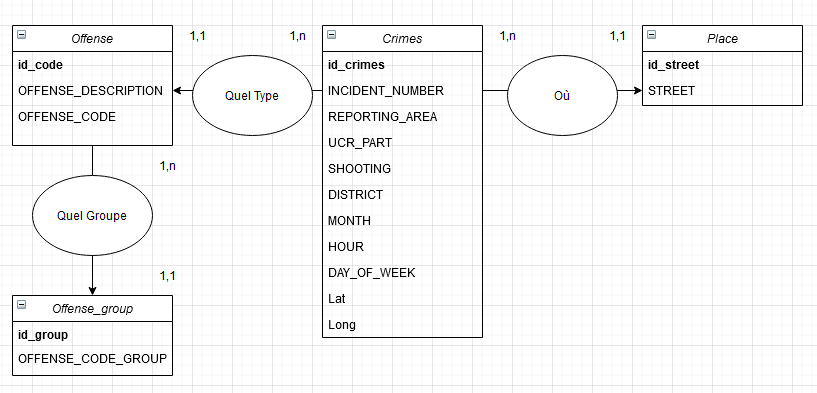

In [48]:
import mysql.connector

config = {
      'user': 'root',
      'password': 'root',
      'host': 'localhost',
      'port': '8081',
      'database': 'boston_baptiste',
      'raise_on_warnings': True,
    }

#Création du Cursor
link = mysql.connector.connect(**config)
cursor = link.cursor()

Les données de notre Dataframe ont été insérées dans notre base de données construit comme tel :

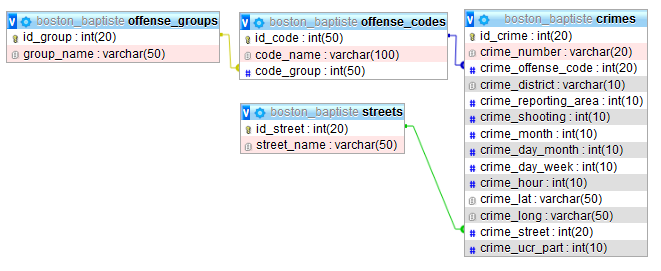

Une table générale contenant la plupart des variables de notre Dataframe à savoir le type du méfait, l'heure, le jour, le mois ainsi que la zone où s'est déroulé le méfait (Latitude, Longitude, Rue et Distirct). Le type du méfait est relié à la table de descrition et au groupe. La rue est quant à elle, reliée à une table affichant le nom de celle-ci.

## Insertion des données en base

In [ ]:
##### Tableau des groupes d'offense :
for row_group in range(len(group_tab)):
    group_id = group_tab["GROUP_ID"][row_group]
    group_name = group_tab["GROUP_NAME"][row_group]
    print(group_id, group_name)
    table = "INSERT INTO offense_groups (id_group, group_name) VALUES (%s, %s)"
    values = (int(group_id), group_name)
    cursor.execute(table, values)
    link.commit()

In [ ]:
##### Tableau des codes :
for row_code in range(len(offense_codes)):
    code_id = offense_codes["CODE"][row_code]
    code_name = offense_codes["NAME"][row_code]
    code_group = offense_codes["OFFENSE_CODE_GROUP"][row_code]
    print(code_id, code_name, code_group)
    table = "INSERT INTO offense_codes (id_code, code_name, code_group) VALUES (%s, %s, %s)"
    values = (code_id.item(), code_name, code_group.item())
    cursor.execute(table, values)
    link.commit()

In [ ]:
##### Tableau des rues :
for row_street in range(len(street_tab)):
    street_id = street_tab["STREET_ID"][row_street]
    street_name = street_tab["STREET_NAME"][row_street]
    print(street_id, street_name)
    table = "INSERT INTO streets (id_street, street_name) VALUES (%s, %s)"
    values = (int(street_id), street_name)
    cursor.execute(table, values)
    link.commit()

In [ ]:
##### Tableau des crimes :
len_crime = len(crime.index)
num_row = 0
percent_crime2 = 0

for row_crime in crime.index:
    try:
        percent_crime = int((num_row/len_crime)*100)
        if percent_crime > percent_crime2:
            percent_crime2 += 1
            print("percent ", percent_crime2)
        num_row += 1
        table = "INSERT INTO crimes (crime_number, crime_offense_code, crime_district, crime_reporting_area, crime_shooting, crime_month, crime_day_month, crime_day_week, crime_hour, crime_lat, crime_long, crime_street, crime_ucr_part) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
        values = (crime["INCIDENT_NUMBER"][row_crime], int(crime["OFFENSE_CODE"][row_crime].item()), crime["DISTRICT"][row_crime], int(crime["REPORTING_AREA"][row_crime]), int(crime["SHOOTING"][row_crime]), int(crime["MONTH"][row_crime]), int(crime["DAY_OF_MONTH"][row_crime]), int(crime["DAY_OF_WEEK"][row_crime]), int(crime["HOUR"][row_crime]), str(crime["Lat"][row_crime]), str(crime["Long"][row_crime]), int(crime["STREET"][row_crime]), int(crime["UCR_PART"][row_crime]))
        cursor.execute(table, values)
        link.commit()
    except:
        pass

# Traitement des données

### Proportion des types d'incident dans Boston en 2017

Nous souhaitons tout d'abord connaitre le type de méfait se déroulant dans Boston. Ayant établi une sélection des données en amont, nous nous concentrons sur celles de la deuxième partie de l'année de 2017.

Nous traitons les données à partir de la base SQL et nous recréons une liste transformée en DataFrame pour leur analyse. Nous avons ici sélectionné les types de méfait par une requête de la table offense_code qui répertorie leurs descriptions. Afin de mesurer la proportion de ces méfaits, nous appelons la méthode value_counts :

In [105]:
cursor.execute("SELECT code_name FROM offense_codes JOIN crimes ON offense_codes.id_code = crimes.crime_offense_code")
rows = cursor.fetchall()

crime = []
for code_name in rows :
    crime.append(code_name)

crime = pd.DataFrame(crime, columns=['Description'])

Nous affichons ensuite celles-ci dans un treemap avec la librairie Plotly :

In [106]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

crime_count = crime['Description'].value_counts()
values =crime_count.values
categories = pd.DataFrame(data=crime_count.index, columns=["Description"])
categories['values'] = values

In [110]:
px.treemap(categories, title='Proportion des méfaits dans Boston de Juillet à Décembre 2017', path=['Description'], values=categories['values'], height=650,
          color_discrete_sequence = px.colors.sequential.dense)

Afin de mieux visualiser les méfaits majeurs dans Boston, nous les représentons sous forme d'histogramme :

In [17]:
Description=categories['Description'][0:10]
Values=categories['values'][0:10]

fig=px.bar(categories, x=Description,
           y=Values, 
           title= 'Top 10 des incidents dans Boston en deuxième partie de 2017',
           color=categories['Description'][0:10],
           color_discrete_sequence = px.colors.sequential.Viridis,
           height=520)

fig.update_layout(
    xaxis_title_text='Interventions', 
    yaxis_title_text='Nombre de cas', 
    bargap=0.2, 
    bargroupgap=0.5)
    
fig.show()

Les enquêtes *a persona* sont en tête de classement suivit par des interventions d'aide à la personne.

### Répartition géographique

Nous souhaitons maintenant savoir où ses interventions sont les plus fréquentes. Nous avons donc fait une requête des données mentionnant le nom des rues de la table streets par l'intermédiaire de la table crimes qui permet de faire une analyse de leur occurence :

In [18]:
cursor.execute("SELECT street_name FROM streets JOIN crimes ON streets.id_street = crimes.crime_street")
rows = cursor.fetchall()

crime = []
for street_name in rows :
    crime.append(street_name)

crime = pd.DataFrame(crime, columns=['Street'])   

In [19]:
crime_count = crime['Street'].value_counts()
values =crime_count.values
categories = pd.DataFrame(data=crime_count.index, columns=["Street"])
categories['values'] = values

In [20]:
Street=categories['Street'][0:10]
Values=categories['values'][0:10]

fig=px.bar(categories, x=Street,
           y=Values, 
           title= 'Les zones de Boston les plus répertoriées',
           color=categories['Street'][0:10],
           color_discrete_sequence = px.colors.sequential.Viridis,
           height=520)

fig.update_layout(
    xaxis_title_text='Zones', 
    yaxis_title_text='Nombre d\'incidents', 
    bargap=0.2, 
    bargroupgap=0.5)
    
fig.show()

Washington ST compte le plus grand nombre d'interventions, suivit par Boylston ST.

On se propose maintenant d'analyser la proportion générale d'intervention dans ce lapse de temps, en mesurant simplement la densité des points de localisation enregistrés.

In [103]:
cursor.execute("SELECT crime_lat, crime_long FROM crimes")
rows = cursor.fetchall()

crime = []
for localisation in rows :
    crime.append(localisation)

crime = pd.DataFrame(crime, columns=['Latitude', 'Longitude'])

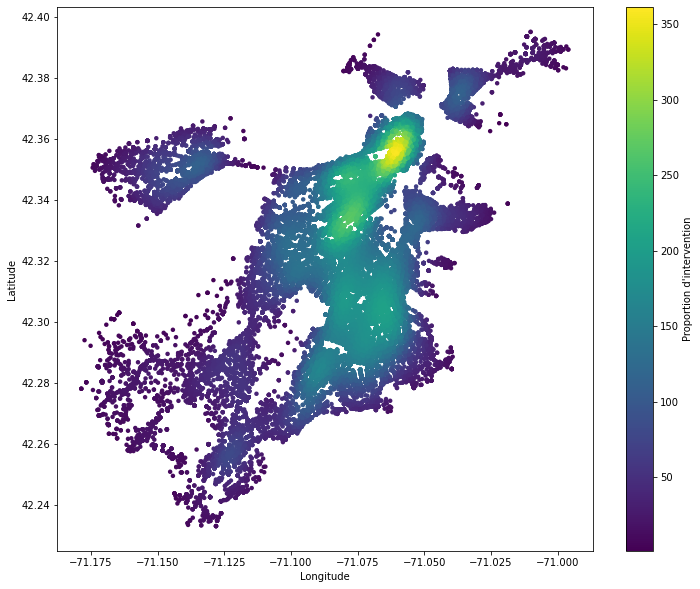

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = crime['Longitude']
x = np.array(x, dtype = float)
y = crime['Latitude']
y = np.array(y, dtype = float)

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
density = ax.scatter(x, y, c=z, s=20, edgecolor='')
fig.colorbar(density, label='Proportion d\'intervention')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().set_size_inches(12,10)
plt.show()

Sur ce graphique, le nombre d'intervention est conséquent dans le District A1 de Boston. Toutefois, ce n'est pas celui qui en compte le plus. Il peut exister un biais du fait de la taille plus restreint de ce district par rapport à d'autre comme le District B2.

In [79]:
cursor.execute("SELECT crime_district FROM crimes")
rows = cursor.fetchall()

district_report = []
for district in rows :
    district_report.append(district)

data = pd.DataFrame(district_report, columns=['District'])
data['District'].value_counts()

B2     7008
C11    6150
D4     5844
B3     5245
A1     5114
C6     3148
D14    3101
E18    2630
E13    2533
E5     2040
A7     1978
A15     983
Name: District, dtype: int64

### Temporalité

Nous souhaitons maintenant connaitre le nombre d'intervention par mois :

In [33]:
cursor.execute("SELECT crime_month FROM crimes")
rows = cursor.fetchall()

crime = []
for month in rows :
    crime.append(month)

crime = pd.DataFrame(crime, columns=['Month']) 

In [34]:
dico = {7 : 'Juillet', 8 : 'Aout', 9 : 'Septembre', 10 : 'Octobre', 11 : 'Novembre', 12 : 'Décembre'}

crime['Month'] = crime['Month'].map(dico)

In [23]:
crime_count = crime['Month'].value_counts()
values =crime_count.values
categories = pd.DataFrame(data=crime_count.index, columns=["Month"])
categories['values'] = values

In [24]:
Month=categories['Month']
Values=categories['values']

fig=px.bar(categories, x=Month,
           y=Values, 
           title= 'Incident entre Juillet et Décembre 2017',
           color=categories['Month'],
           color_discrete_sequence = px.colors.sequential.Viridis,
           height=520)

fig.update_layout(
    xaxis_title_text='Mois', 
    yaxis_title_text='Nombre d\'incidents', 
    bargap=0.2, 
    bargroupgap=0.3)
    
fig.show()

D'après ces résultats, il y a plus d'intervention dans Boston durant les mois d'été de 2017. Elles diminuent en Novembre et Décembre.

Nous voulons voir qu'elle est la proportion des interventions liées aux Vandalismes déclarés en fonction des jours de la semaine. Nous effectuons une requête pour récupérer les jours de la semaine en fonction des actes de vandalisme répertoriés. Nous avons ainsi récupéré la fréquence de ces actes en fonction des jours de la semaine, et ainsi voir s'ils avaient lieu à des jours précis.

In [25]:
cursor.execute("SELECT crime_day_week FROM crimes JOIN offense_codes ON offense_codes.id_code = crimes.crime_offense_code WHERE code_name = 'VANDALISM'")
rows = cursor.fetchall()

crime = []
for crime_day_week in rows :
    crime.append(crime_day_week)

crime = pd.DataFrame(crime, columns=['Méfait'])   

In [26]:
dico = {1 : 'Lundi', 2 : 'Mardi', 3 : 'Mercredi', 4 : 'Jeudi', 5 : 'Vendredi', 6 : 'Samedi', 7 : 'Dimanche'}

crime['Méfait'] = crime['Méfait'].map(dico)

In [27]:
crime_count = crime['Méfait'].value_counts()
values =crime_count.values
categories = pd.DataFrame(data=crime_count.index, columns=["Méfait"])
categories['values'] = values

In [28]:
crimes_year = crime['Méfait'].value_counts()
yearly = pd.DataFrame(data=crimes_year.index, columns = ['Méfait'])
yearly['values']=crimes_year.values

fig = px.pie(yearly, values='values', names='Méfait', color_discrete_sequence=px.colors.sequential.Viridis)
fig.show()

Les actes de Vandalismes sont plus fréquents le week-end d'après nos données de Boston en deuxième partie de l'année 2017. A voir, si ces différences sont significatives par un test statistique.

Nous pouvons réitérer l'analyse cette fois-ci en fonction de l'heure dans une journée type :

In [111]:
cursor.execute("SELECT crime_hour FROM crimes JOIN offense_codes ON offense_codes.id_code = crimes.crime_offense_code WHERE code_name = 'VANDALISM'")
rows = cursor.fetchall()

crime = []
for crime_day_week in rows :
    crime.append(crime_day_week)

crime = pd.DataFrame(crime, columns=['Méfait'])

In [112]:
crime_count = crime['Méfait'].value_counts()
values =crime_count.values
categories = pd.DataFrame(data=crime_count.index, columns=["Méfait"])
categories['values'] = values

In [113]:
Vandalism=categories['Méfait']
Values=categories['values']

fig=px.bar(categories, x=Vandalism,
           y=Values, 
           title= 'Nombre d\'actes de vandalisme en fonction de l\'heure (Boston Juil. Dec. 2017)',
           color= categories['Méfait'],
           color_discrete_sequence = px.colors.sequential.Viridis,
           height=520)

fig.update_layout(
    xaxis_title_text='Heure', 
    yaxis_title_text='Méfait', 
    bargap=0.2, 
    bargroupgap=0.3)
    
fig.show()

Les actes signalés sont plus nombreux en soirée et jusqu'à Minuit et diminue la nuit.

# Conclusion

Le Dataset Boston_crime présentait de nombreuses variables à traiter. De nombreuses stratégies ont été mises en place afin de nettoyer le Dataset au vu de son intégration en BDD et son exploitation.

De nombreuses analyses peuvent être réalisées, traitant des Targets par rapport à plusieurs Features possible. Cependant une analyse de la corrélation pourrait potentiellement être faite en prenant d'autres paramètres non-disponible dans le dataset d'origine (Situation Socio-économique en fonction du nombre d'intervention etc...).

Au niveau de la gestion des données, des procédures et vues seront à intégrer afin de se concentrer sur celles qui nous intéressent.